# Lab 5

## This lab will begin with lecture 5-specific material, and we will then move on to doing a review of all of the material for this course. 

### Let's start by importing the data set. For this lab, we are going to continue working with the marketing data set that we started working with in the last lab. Use .head() to remind yourself of the columns and data. 

### Also, make sure that you make the same modifications to the income variable, to be sure that you can work easily with the numbres. 

In [134]:
import pandas as pd
df = pd.read_csv ('marketing_data.csv')

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


#### Now, let's try to practice creating graphical representations of the data.

##### What kind of graph would you use if you wanted to plot the distribution of the incomes? Make sure to explain what would be on the x axis and on the y axis. 

To plot the distribution of income I went with a histogram. The x axis represent the income level and the y axis represent the amount of individuals who make that amount.

##### Now, create the graph. Be sure to import the correct packages if you haven't already. 

666666.0


Text(0.5, 1.0, 'Histogram of Income')

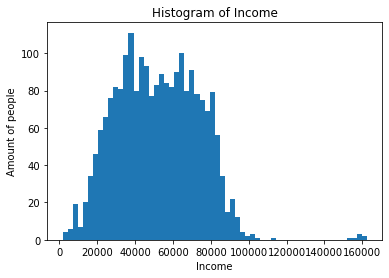

In [138]:
import matplotlib.pyplot as plt
import numpy as np

income = df[' Income '].replace('[\$,]', '', regex=True).astype(float)
income = [x for x in income if math.isnan(x) == False]

# Removing strange value 666666.0
income.remove(max(income))

plt.hist(income,bins=60);
plt.ylabel("Amount of people")
plt.xlabel("Income")
plt.title("Histogram of Income")

##### How would you show the relationship between the customer's income (independent variable) and the customer's number of purchases (dependent variable)? Make sure to explain what would be on the x axis and on the y axis. 

What we can use is a scatter plot chart. On the x axis we would have the income of the customers and on the y axis we would have the number of purchases.

##### Now, create the plot that you described above. 

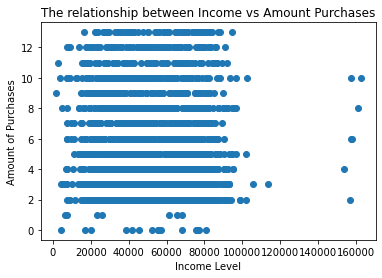

In [151]:
import math

# Cleaning up data by removing NAN
customer_purchases = df['NumStorePurchases'].replace('[\$,]', '', regex=True).astype(int)
income = [x for x in income if math.isnan(x) == False]
# There is a mismatch in size. I trimmed off the last 24 items off of customer_purchases
customer_purchases = customer_purchases[:2215]
# Plotting chart
plt.scatter(income,customer_purchases);
plt.ylabel("Amount of Purchases")
plt.xlabel("Income Level")
plt.title("The relationship between Income vs Amount Purchases");
# Data needs to be transformed to make it linear

##### Now, calculate the z scores for each variable using list comprehension. Then, use the z scores to calculate the correlation coefficient. 
##### Note: you may need to remove nan values from your zproduct list. Make sure to do this before calculating the correlation coefficient! 

In [179]:
from scipy.stats import pearsonr

# Calculating Z-Score
income2 = df[' Income '].replace('[\$,]', '', regex=True).astype(float)
customer_purchases2 = df['NumStorePurchases'].replace('[\$,]', '', regex=True).astype(int)

x_income = income2.mean()
s_income = income2.std()

x_purchase = customer_purchases2.mean()
s_purchase = customer_purchases2.std()

# Printing nums:
print(f"Mean: {x_income} STD: {s_income}")
print(f"Mean: {x_purchase} STD: {s_purchase}")

# Calculate Z Score


#Correlation coefficient
np.corrcoef(income, customer_purchases)


Mean: 52247.25135379061 STD: 25173.0766609014
Mean: 5.790178571428571 STD: 3.2509581456744203


array([[1.        , 0.03176677],
       [0.03176677, 1.        ]])

##### Is this a strong correlation coefficient? How would you interpret the relationship between income and number of purchased items? 

In [ ]:
This looks like a low correlation based on the value 0.04

##### Create the same graph and perform the same calculations for income vs MntWines. How do you interpret that R^2 value? 

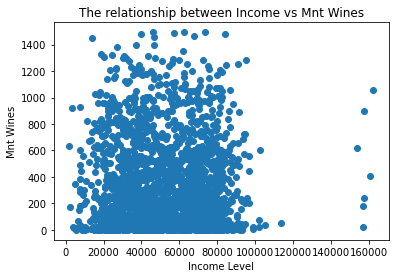

In [154]:
mnt_wines = df['MntWines']
mnt_wines = mnt_wines[:2215]
plt.scatter(income,mnt_wines);
plt.ylabel("Mnt Wines");
plt.xlabel("Income Level");
plt.title("The relationship between Income vs Mnt Wines");

In [ ]:
There is no corelation between income level and mnt wines.

# Regression Practice 1

In the examples used in class, we used the Numpy method polyfit to create our regression.
You can continue doing this, or try with the scikit learn libary. Scikit learn is a VERY popular
library in the data science world so it might be helpful to get used to it.
You can follow this tutorial if you want to try with the scikit learn library: 
https://realpython.com/linear-regression-in-python/



Let's say your company hypothesizes that a customer's household income impacts the total number of purchases they make.
Start by creating the total_purchases column, which should be the sum of the 'NumDealsPurchases', 'NumWebPurchases',
'NumCatalogPurchases', and 'NumStorePurchases' columns.

In [118]:
# Cop
df['NumDealsPurchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df['NumDealsPurchases']

0       29
1       35
2       21
3        7
4       14
        ..
2235    38
2236     9
2237    26
2238    39
2239    35
Name: NumDealsPurchases, Length: 2240, dtype: int64

Now, create a scatterplot to see what we're working with:

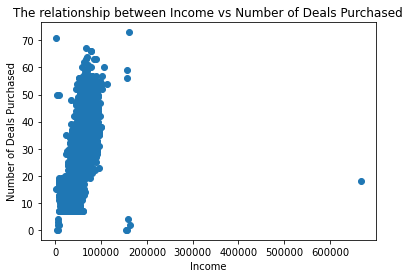

In [124]:
num_deals_purchases = df['NumDealsPurchases']
income_level = df[' Income '].replace('[\$,]', '', regex=True).astype(float)
plt.scatter(income_level,num_deals_purchases);
plt.ylabel("Number of Deals Purchased");
plt.xlabel("Income");
plt.title("The relationship between Income vs Number of Deals Purchased");

Filter the dataframe to users with income less than $100,000 to remove outliers.
Re-create your total_purchases column in this new dataframe.

In [169]:
# Drop NaNs
df_new = df.dropna()
# Convert all income with floats
df_new[' Income '] = df_new[' Income '].replace('[\$,]', '', regex=True).astype(float)
# Filter out all that make less than 100000
df_new = df_new[df_new[' Income '] < 100000.0]
df_new['NumDealsPurchases'] = df_new['NumDealsPurchases'] + df_new['NumWebPurchases'] + df_new['NumCatalogPurchases'] + df_new['NumStorePurchases']
df_new['NumDealsPurchases']

<ipython-input-169-26b1f11fcb28>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[' Income '] = df_new[' Income '].replace('[\$,]', '', regex=True).astype(float)


0       15
1       18
2       11
3        4
4        8
        ..
2235    20
2236     5
2237    14
2238    20
2239    18
Name: NumDealsPurchases, Length: 2203, dtype: int64

Re-draw the plot

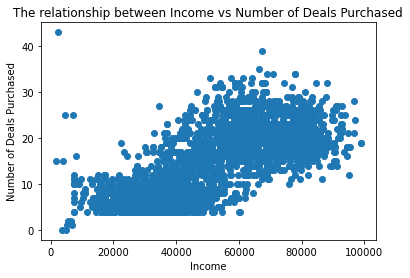

In [170]:
num_deals_purchases = df_new['NumDealsPurchases']
income_level = df_new[' Income ']

plt.scatter(income_level,num_deals_purchases);
plt.ylabel("Number of Deals Purchased");
plt.xlabel("Income");
plt.title("The relationship between Income vs Number of Deals Purchased");

Much better! Now run the regression. Decide if you think it's linear or needs to be transformed.

In [177]:
m,b = np.polyfit(income_level, num_deals_purchases,1)
print(f"y = {round(m,2)}x + {round(b,2)}")

y = 0.0x + 1.56


# Regression Practice 2

In [ ]:
# Let's say we now hypothesize that the customer's income level impacts just web purchases.
# Display the scatterplot

plt.scatter(income_level,num_deals_purchases);
plt.ylabel("Number of Deals Purchased");
plt.xlabel("Income");
plt.title("The relationship between Income vs Number of Deals Purchased");

In [ ]:
# Let's remove some outliers; restrict to incomes less than 100,000, and web purchases less than 15.
# Then redraw the scatterplot.


Is this curved or straight? Hard to tell, right? (If you're not sure, run it both ways! Great practice!)

In [45]:
# Hard to tell, but it seems to be curved. Here's running it both ways though:

In [ ]:
# Run the linear regression


In [ ]:
#Print some of the model features


In [ ]:
# Establish the line


In [ ]:
#Visualize the results


Is this an ideal model? No, of course not. We can tell from the scatterplot it doesn't really look linear.
The R-Squared value isn't great either.
Unforutnately this will be the majority of data you encounter in the real world.
There will be very few circumstances where the scatterplot looks nice and neat like in fake examples
you may have seen in school. R-squared values above .9 are also relatively rare to come across.

In [ ]:
# Regression with Log:



In [ ]:
#Print some of the model features


In [ ]:
# Establish the line


In [ ]:
#Visualize the results


# Class Review

### Now, let's do a review of the full course material! We will use the fundamentals data set for this section. Start by using  the .head() function. 

In [83]:
df2 = pd.read_csv ('fundamentals.csv')
df2.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


Let's start by doing exploratory data analysis on the After Tax ROE variable. Calculate the mean, median, mode, range and standard deviation of this variable. 

In [101]:
after_tax_roe = df2['After Tax ROE']
print(f"Mean  : {round(after_tax_roe.mean(),2)} Median: {after_tax_roe.median()} Mode  : {after_tax_roe.mode()} Range : {after_tax_roe.max() - after_tax_roe.min()} Std: {round(after_tax_roe.std(),2)}")


Mean  : 43.6 Median: 16.0 Mode  : 0    10.0
dtype: float64 Range : 5789.0 Std: 233.92


Now, create a histogram of the Cash Ratio. 

Text(0.5, 1.0, 'Histogram of Cash Ratio')

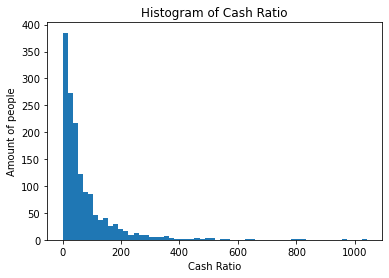

In [105]:
cash_ratio = df2['Cash Ratio']
plt.hist(cash_ratio,bins=60);
plt.ylabel("Amount of people")
plt.xlabel("Cash Ratio")
plt.title("Histogram of Cash Ratio")

Describe the shape, center and spread of the distribution. 

In [ ]:
The distribution is skewed right with a center around 100, and a spread of 0-1100

Say that you wanted to survey a subset of the dataset. How many people would you want to sample? 

In [112]:
data_set_size = len(df2['Cash Ratio'])
print(data_set_size * .11)

195.91


Now, use .sample to sample your choice of rows of the fundamentals data set. 

In [115]:
df2['Cash Ratio'].sample(10)

514      70.0
320       NaN
1103     13.0
186      30.0
862     428.0
1180     57.0
1417      NaN
1328     17.0
1058      3.0
231      22.0
Name: Cash Ratio, dtype: float64

Now calculate the mean and standard deviation Cash Ratio of your sample. 

In [116]:
df2['Cash Ratio'].describe()

count    1482.000000
mean       74.457490
std       102.298374
min         0.000000
25%        17.000000
50%        41.000000
75%        90.000000
max      1041.000000
Name: Cash Ratio, dtype: float64

Use the appropriate hypothesis test to determine whether the difference in mean between your sample and the full data set is statistically significant at the 5% level. Make sure to remove any nan values before running your test! 

In [176]:
cash_ratio = df2['Cash Ratio']
cash_ratio.dropna()

from statsmodels.stats.proportion import proportions_ztest
sample_success = 
sample_size = len(cash_ratio)
null_hypothesis = .5
# for ha != ho use alternative = 'two-sided'
proportions_ztest(count=sample_success, nobs=sample_size, value=null_hypothesis, alternative='two-sided')

NameError: name 'null_hypothesis' is not defined

Based on your hypothesis test, what can you conclude? 